In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #NEW!!
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

In [4]:
# Load the MPG dataset
mpg = sns.load_dataset('mpg')

# Choose only the 'horsepower' feature for visualization
mpg = mpg.dropna()
X = mpg[['horsepower']]
y = mpg['mpg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_train.shape
X_train_scaled.shape

MSE: 22.15099079188857, RMSE: 4.70648390966001


C:\Users\USER\anaconda3\envs\env23\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


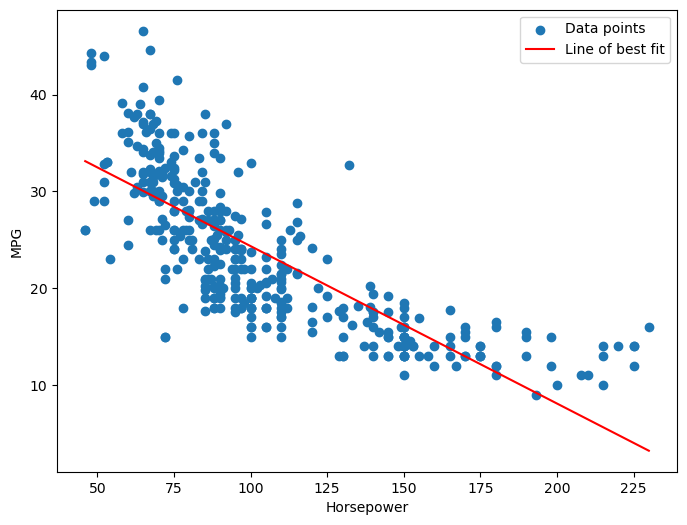

In [6]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.cost_history = []
        self.weights_history = []
        self.bias_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # calculate cost
            cost = (1 / n_samples) * np.sum((y - y_predicted) ** 2)
            self.cost_history.append(cost)
            self.weights_history.append(self.weights[0])  # store the weights history
            self.bias_history.append(self.bias)  # store the bias history

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Create an instance of the class
regressor = LinearRegression(learning_rate=0.10, n_iters=1000) # educational
#regressor = LinearRegression(learning_rate=0.01, n_iters=1000) # original

# Fit the model to the data
regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = regressor.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

# Data plot
plt.figure(figsize=(8,6))
plt.scatter(X['horsepower'], y, label='Data points')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# Generate line of best fit
X_line = np.linspace(min(X['horsepower']), max(X['horsepower']), len(X)).reshape(-1,1)
y_line = regressor.predict(scaler.transform(X_line))
plt.plot(X_line, y_line, color='red', label='Line of best fit')

plt.legend()
plt.show()

In [ ]:
#Non-Vectorized code block example:
import random

# Initialize two lists each with 1,000,000 elements
w = [random.random() for _ in range(1000000)]
x = [random.random() for _ in range(1000000)]

# Compute the sum of the product of corresponding elements in w and x
result = 0
for i in range(len(w)):
    result += w[i] * x[i]

print(result)

In [ ]:
#Vectorized code block example:
import numpy as np

# Convert the lists to numpy arrays
w_array = np.array(w)
x_array = np.array(x)

# Compute the dot product of w_array and x_array
result_vectorized = np.dot(w_array, x_array)

print(result_vectorized)

In [9]:
import time
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Set the random seed
np.random.seed(42)

# Load the dataset and preprocess
mpg_data = sns.load_dataset('mpg')
mpg_data.dropna(inplace=True)  # Remove rows with missing values

# We'll use 'horsepower', 'weight', and 'cylinders' as the features (X) and 'acceleration' as the target (y)
X = mpg_data[['horsepower', 'weight', 'cylinders']].values
y = mpg_data['acceleration'].values

# Normalize the features and the target
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Initialize weights randomly
W = np.random.randn(X.shape[1])

# Set learning rate and number of epochs
learning_rate = 0.01
epochs = 1000

# Record the start time
start_time = time.time()


# Implement gradient descent without vectorization
for _ in range(epochs):
    for i in range(len(y)):
        prediction = 0
        for j in range(X.shape[1]):
            prediction += W[j] * X[i, j]
        error = prediction - y[i]

        # Update the weights
        for j in range(X.shape[1]):
            W[j] -= learning_rate * error * X[i, j] / len(y)

# Predict acceleration for all cars
predictions = [sum(W[j] * X[i, j] for j in range(X.shape[1])) for i in range(len(y))]

# Compute MSE
mse = sum((predictions[i] - y[i]) ** 2 for i in range(len(y))) / len(y)

# Record the end time
end_time = time.time()

# Print MSE
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")

# Compute the difference between the end time and the start time
execution_time = end_time - start_time


print(f"Time taken: {execution_time} seconds")

MSE: 0.4315038373669547
RMSE: 0.6568895168648642
Time taken: 1.9447696208953857 seconds


In [8]:
import time
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Set the random seed
np.random.seed(42)

# Load the dataset and preprocess
mpg_data = sns.load_dataset('mpg')
mpg_data.dropna(inplace=True)  # Remove rows with missing values

# We'll use 'horsepower', 'weight', and 'cylinders' as the features (X) and 'acceleration' as the target (y)
X = mpg_data[['horsepower', 'weight', 'cylinders']].values
y = mpg_data['acceleration'].values

# Normalize the features and the target
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Initialize weights randomly
W = np.random.randn(X.shape[1])

# Set learning rate and number of epochs
learning_rate = 0.01
epochs = 1000


# Record the start time
start_time = time.time()


# Implement gradient descent with vectorization
for _ in range(epochs):
    predictions = np.dot(X, W)
    errors = predictions - y

    # Update the weights
    W -= learning_rate * np.dot(errors, X) / len(y)

# Predict acceleration for all cars
predictions = np.dot(X, W)

# Compute MSE
mse = np.mean((predictions - y) ** 2)

# Record the end time
end_time = time.time()

print(f"MSE: {mse}")


# Compute the difference between the end time and the start time
execution_time = end_time - start_time


print(f"Time taken: {execution_time} seconds")

MSE: 0.43148089455598065
Time taken: 0.01725006103515625 seconds
